In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv('../../../data/FIFA/FIFA_train.csv')
test_df = pd.read_csv('../../../data/FIFA/FIFA_test.csv')

In [3]:
train_df = pd.DataFrame(train_df)
train_df

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8927,16925,S. Adewusi,18,africa,2019,MF,right,1.0,48,63,3.0,60000.0
8928,16936,C. Ehlich,19,europe,2020,DF,right,1.0,47,59,2.0,40000.0
8929,16941,N. Fuentes,18,south america,2021,DF,right,1.0,47,64,2.0,50000.0
8930,16942,J. Milli,18,europe,2021,GK,right,1.0,47,65,1.0,50000.0


In [4]:
print(train_df.isna().sum().sum())
print(test_df.isna().sum().sum())

0
0


In [5]:
print(train_df.shape)
print(test_df.shape)

(8932, 12)
(3828, 11)


In [6]:
train_df.describe()

,id,age,reputation,stat_overall,stat_potential,stat_skill_moves,value
count,8932.000000,8932.000000,8932.000000,8932.000000,8932.000000,8932.000000,8.932000e+03
mean,7966.775750,25.209136,1.130878,67.091133,71.997201,2.401702,2.778673e+06
std,4844.428521,4.635515,0.423792,6.854910,5.988147,0.776048,5.840982e+06
min,0.000000,16.000000,1.000000,47.000000,48.000000,1.000000,1.000000e+04
25%,3751.750000,21.000000,1.000000,63.000000,68.000000,2.000000,3.750000e+05
50%,7696.500000,25.000000,1.000000,67.000000,72.000000,2.000000,8.250000e+05
75%,12082.250000,28.000000,1.000000,72.000000,76.000000,3.000000,2.600000e+06
max,16948.000000,40.000000,5.000000,94.000000,94.000000,5.000000,1.105000e+08


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8932 non-null   int64  
 1   name              8932 non-null   object 
 2   age               8932 non-null   int64  
 3   continent         8932 non-null   object 
 4   contract_until    8932 non-null   object 
 5   position          8932 non-null   object 
 6   prefer_foot       8932 non-null   object 
 7   reputation        8932 non-null   float64
 8   stat_overall      8932 non-null   int64  
 9   stat_potential    8932 non-null   int64  
 10  stat_skill_moves  8932 non-null   float64
 11  value             8932 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 837.5+ KB


In [8]:
train_df.drop(['id', 'name'], axis=1, inplace=True)

In [9]:
print(train_df['continent'].value_counts())
print('################################')
print(train_df['contract_until'].value_counts())
print('################################')
print(train_df['position'].value_counts())
print('################################')
print(train_df['prefer_foot'].value_counts())

europe           5322
south america    1927
asia              787
africa            721
oceania           175
Name: continent, dtype: int64
################################
2019            2366
2021            2308
2020            2041
2022             761
2023             506
Jun 30, 2019     501
2018             327
Dec 31, 2018      64
May 31, 2019      19
2024              12
Jan 31, 2019      10
Jun 30, 2020       9
2025               3
Jan 1, 2019        2
2026               1
May 31, 2020       1
Jan 12, 2019       1
Name: contract_until, dtype: int64
################################
MF    3428
DF    2791
ST    1705
GK    1008
Name: position, dtype: int64
################################
right    6837
left     2095
Name: prefer_foot, dtype: int64


In [10]:
train_df['contract_until'] = train_df['contract_until'].map(lambda x : x[-4:] if len(x) > 4 else x[:])
train_df['contract_until'] = train_df['contract_until'].astype('int64')
train_df['contract_until'].value_counts()

2019    2899
2021    2308
2020    2051
2022     761
2023     506
2018     391
2024      12
2025       3
2026       1
Name: contract_until, dtype: int64

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               8932 non-null   int64  
 1   continent         8932 non-null   object 
 2   contract_until    8932 non-null   int64  
 3   position          8932 non-null   object 
 4   prefer_foot       8932 non-null   object 
 5   reputation        8932 non-null   float64
 6   stat_overall      8932 non-null   int64  
 7   stat_potential    8932 non-null   int64  
 8   stat_skill_moves  8932 non-null   float64
 9   value             8932 non-null   float64
dtypes: float64(3), int64(4), object(3)
memory usage: 697.9+ KB


In [12]:
cat_features = ['continent', 'contract_until', 'position']
num_features = ['age', 'contract_until', 'reputation', 'stat_overall', 'stat_potential', 'stat_skill_moves', 'value']

0
1
2


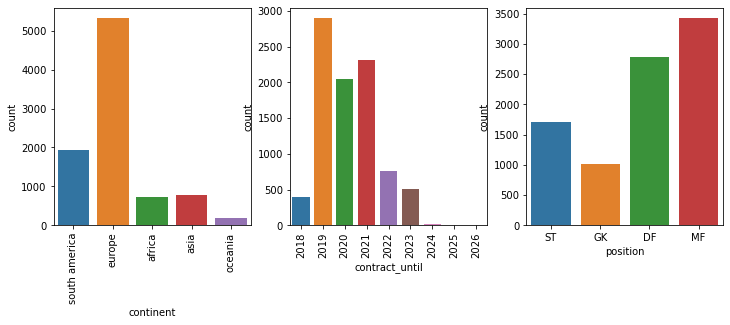

In [13]:
fig, ax = plt.subplots(1, len(cat_features), figsize=(12, 4))

for idx, column in enumerate(cat_features):
    sns.countplot(column, data=train_df, ax=ax[idx])
    print(idx)
    for idx in range(2):
        ax[idx].set_xticklabels(ax[idx].get_xticklabels(), rotation=90)

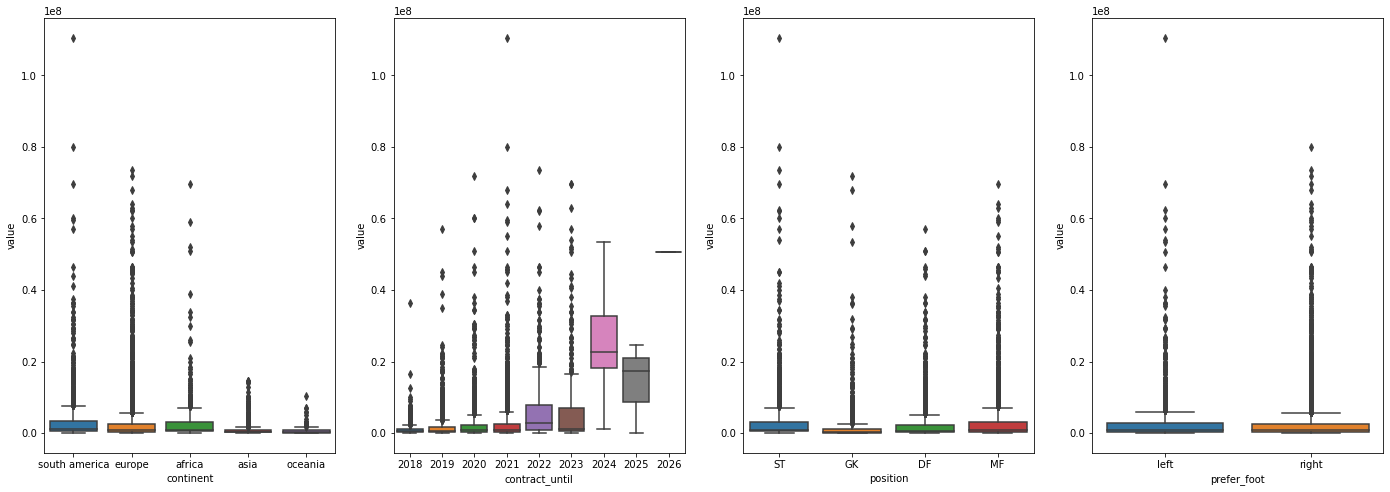

In [14]:
f, ax = plt.subplots(1,4, figsize=(24,8))
col = ["continent", "contract_until", "position", "prefer_foot"]

for i in range(len(col)):
    sns.boxplot(data=train_df,x=col[i],y="value",ax=ax[i])
plt.show()

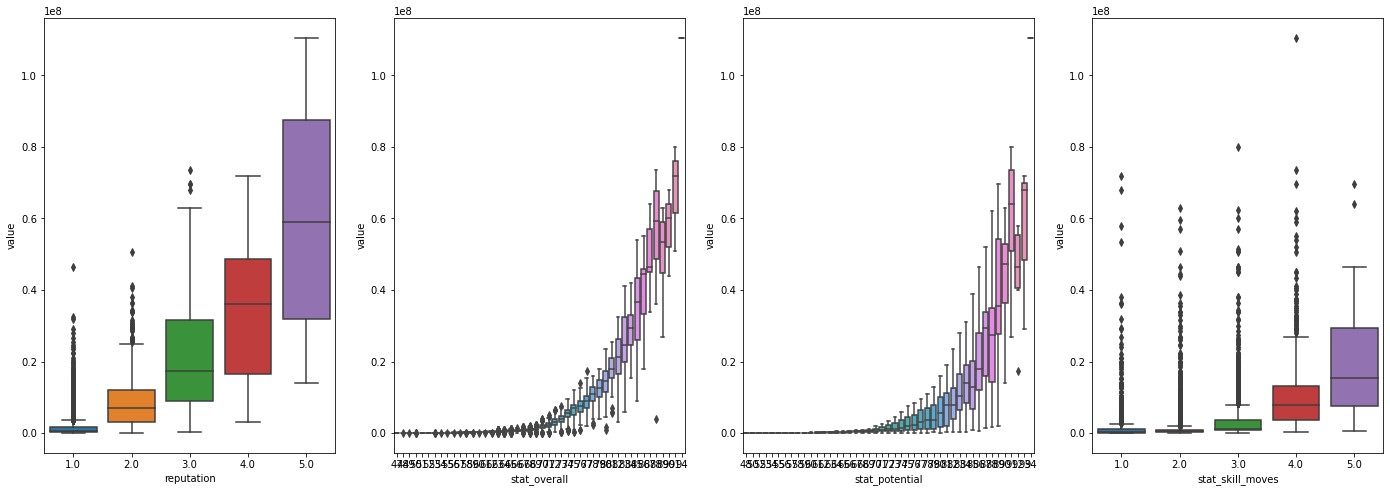

In [15]:
f, ax = plt.subplots(1,4, figsize=(24,8))
col_list = ["reputation", "stat_overall", "stat_potential", "stat_skill_moves"]

for i in range(len(col_list)):
    sns.boxplot(data=train_df, x=col_list[i], y="value", ax=ax[i])
plt.show()

<AxesSubplot:>

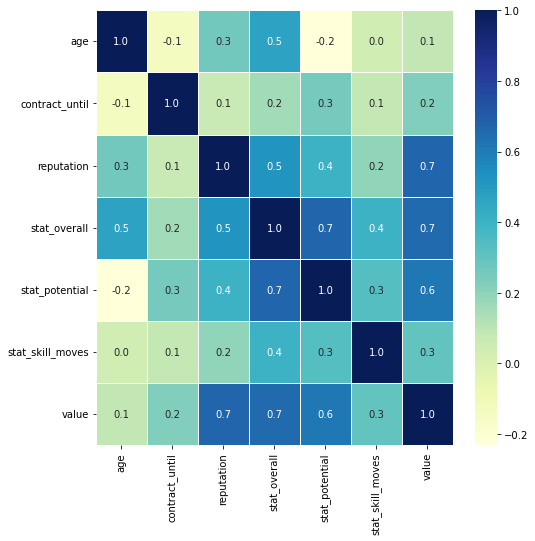

In [16]:
plt.figure(figsize=(8, 8))
corr = train_df.corr()
sns.heatmap(corr, annot=True, fmt='.1f',  linewidths=0.5, cmap='YlGnBu')

<AxesSubplot:xlabel='stat_overall', ylabel='value'>

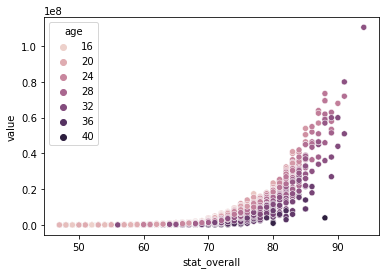

In [17]:
sns.scatterplot(x='stat_overall', y='value', hue='age', data=train_df)

<AxesSubplot:xlabel='stat_potential', ylabel='value'>

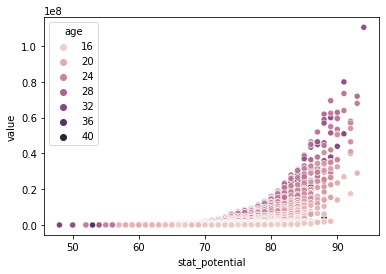

In [18]:
sns.scatterplot(x='stat_potential', y='value', hue='age', data=train_df)

<AxesSubplot:xlabel='reputation', ylabel='value'>

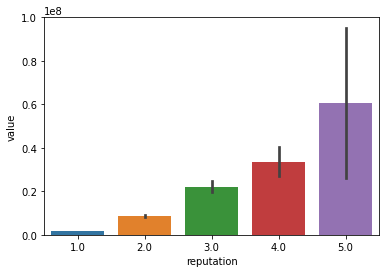

In [240]:
sns.barplot(x='reputation', y='value', data=train_df)

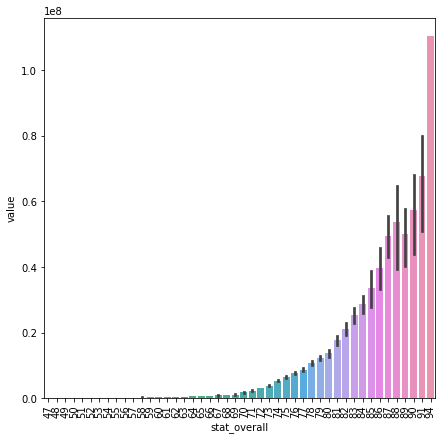

In [241]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
sns.barplot(x='stat_overall', y='value', data=train_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

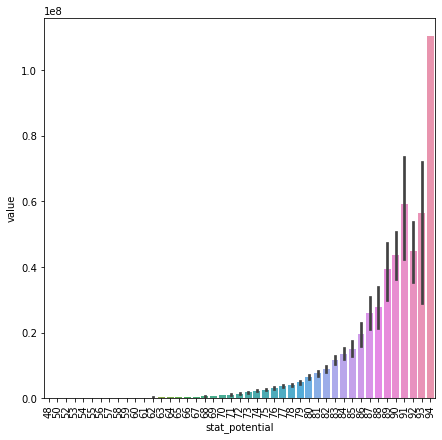

In [242]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
sns.barplot(x='stat_potential', y='value', data=train_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

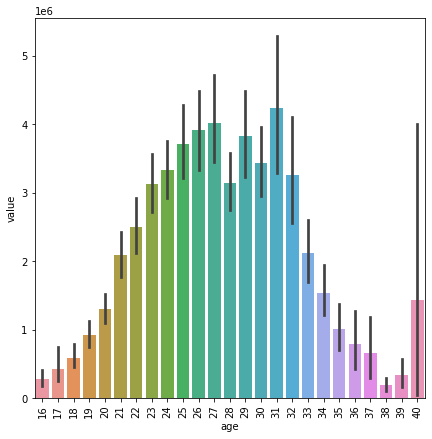

In [243]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
sns.barplot(x='age', y='value', data=train_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

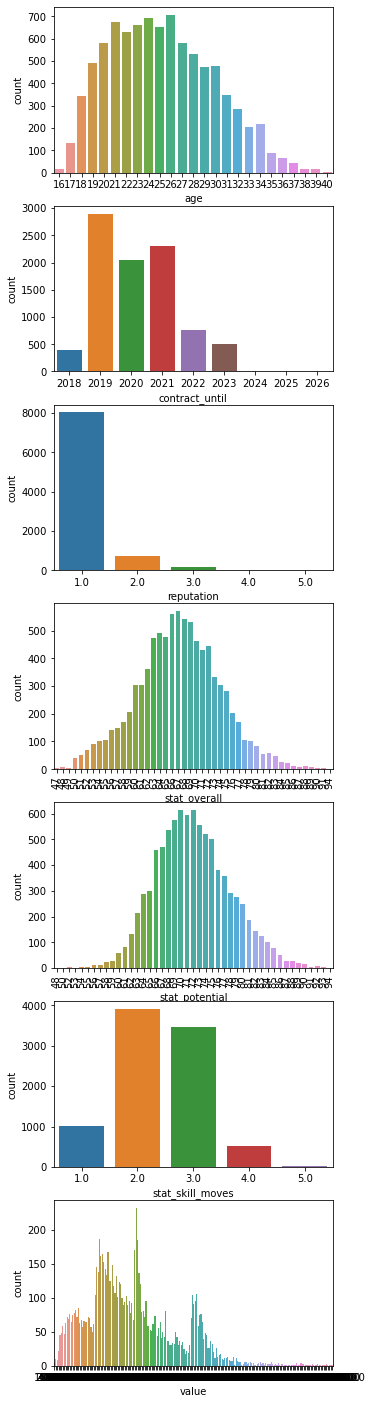

In [351]:
fig, ax = plt.subplots(len(num_features), 1, figsize=(5, 25))
for idx, column in enumerate(num_features):
    sns.countplot(column, data=train_df, ax=ax[idx])
    if idx == 3 or idx == 4:
        ax[idx].set_xticklabels(ax[idx].get_xticklabels(), rotation=90)

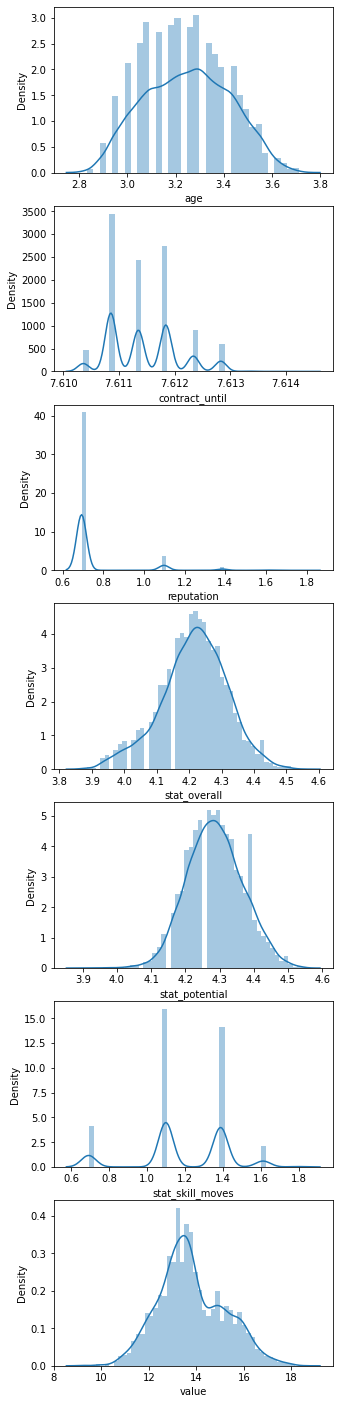

In [180]:
fig, ax = plt.subplots(len(num_features), 1, figsize=(5, 25))

for idx, col in enumerate(num_features):
    log_col = np.log1p(train_df[col])
    sns.distplot(log_col, kde=True, ax=ax[idx])
    

In [215]:
train = pd.get_dummies(columns = ['continent', 'position', 'prefer_foot'], data = train_df)

In [216]:
train.head(3)

,age,contract_until,reputation,stat_overall,stat_potential,stat_skill_moves,value,continent_africa,continent_asia,continent_europe,continent_oceania,continent_south america,position_DF,position_GK,position_MF,position_ST,prefer_foot_left,prefer_foot_right
0,31,2021,5.0,94,94,4.0,110500000.0,0,0,0,0,1,0,0,0,1,1,0
1,27,2020,4.0,91,93,1.0,72000000.0,0,0,1,0,0,0,1,0,0,0,1
2,31,2021,5.0,91,91,3.0,80000000.0,0,0,0,0,1,0,0,0,1,0,1


### 테스트 해볼 것

- XGBRegressor, LightRegressor
- Base data  ㅡ  log data  ㅡ  log / StandardScaler data  ㅡ  One-hot encoding data
- 각 데이터로 학습을 진행하고 데이터 셋이 변함에 따라 정확도, 정밀도, 재현율, f1 score, roc-auc가 어떻게 변하는지 비교
- NGRegressor, stacking - 모델 향상 시도